# Biological Role Model - What is a Neuron?
I will start with a very simple explanation which is sufficient to understand the current modelling approaches in neural networks and those who are not experienced in biology or neuroscience could also read the respective chapter in a current teaching book like e.g. the Campbell Biology <a href="#urry2017">[1]</a>:  

A biological neuron receives inputs at the dendrites from other neurons via synapses (figure 1).  
<p style="text-align:center;font-size:80%;font-style:italic">
    <img width="50%" src="./Figures/Neuron2.png">
    <br>
    Figure 1: Simplified sketch of a neuron.
</p>

It integrates those signals and produces a spike train at its axon hillock. A spike is a short and strong change in the membrane potential of the axon (also called action potential), characterised by a high peak of depolarisation with a following phase of hyperpolarisation (refractory period) before the membrane potential reaches its original potential again (figure 2).

<p style="text-align:center;font-size:80%;font-style:italic">
    <a target="_blank" rel="noopener" href="https://commons.wikimedia.org/wiki/File:Action_potential.svg#/media/File:Action_potential.svg"><img width="50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Action_potential.svg/1200px-Action_potential.svg.png" alt="Action potential.svg"></a>
    <br>
    Figure 2: Action potential as voltage at the cell membrane of a neurons axon: From a resting potential the membrane potential depolarises when a certain threshold is reached. The subsequent polarisation overshoots the resting potential and yields a hyperpolarisation of the membrane. In this phase, called refractory period, it is almost impossible to trigger a new spike at the specific region of the axon. Thereby, action potentials can only travel in one direction along the axon membrane. 
    (Original by <a target="_blank" rel="noopener" href="https://en.wikipedia.org/wiki/User:Chris_73" class="extiw" title="en:User:Chris 73">en:User:Chris 73</a>, updated by <a target="_blank" rel="noopener" href="https://en.wikipedia.org/wiki/User:Diberri" class="extiw" title="en:User:Diberri">en:User:Diberri</a>, converted to SVG by <a target="_blank" rel="noopener" href="//commons.wikimedia.org/wiki/User:Tomtheman5" title="User:Tomtheman5">tiZom</a> - <span class="int-own-work" lang="en">Own work</span>, <a target="_blank" rel="noopener" href="http://creativecommons.org/licenses/by-sa/3.0/" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a target="_blank" rel="noopener" href="https://commons.wikimedia.org/w/index.php?curid=2241513">Link</a>)
</p>

In the phase of hyperpolarisation the neuron cannot produce new spikes and hence the duration of hyperpolarisation determines the maximum spike frequency the neuron can emit. The spike travels along the axon of the neuron as a depolarisation of the cell membrane (figure 1, action potentials). When the spike train reaches the axon terminal with the synapse to the dendrites of the next neuron, it leads to a spike-frequency dependent release of neurotransmitters. Those neurotransmitters can either be excitatory or inhibitory for the activity of the next neuron. Depending on the number and size of synapses the influence of the upstream (pre-synaptic) neuron on the activity of the downstream (post-synaptic) neuron can be higher or lower. Additionally, the synapses undergo synaptic-plasticity, meaning that they change their size according to the activity of the up- and downstream neuron.  

---

# Technical Abstraction
From here we will try to derive a mathematical description for the described behaviour of a neuron. Firstly the size and number of synapses between two neurons can be abstracted by a weight that represents the connection strength between the neurons. Additionally, the algebraic sign of the weight denotes whether the connection is excitatory (+) or inhibitory (-). When we look at one neuron that receives inputs from other neurons, the input to this neuron consists of the weighted sum of all outputs from its upstream neurons. Based on these inputs, a biological neuron would again emit a spike train. To model this spike train, two basic approaches exist:

Spiking models (e.g. <a href="izhikevich2003">[2]</a>) are more detailed and describe the creation of spikes and their translation to transmitter concentrations. These models are often used to model small artificial networks or even in computational neuroscience to model existing (sub-)networks.An even more simplified modelling approach only describes the spike-frequency as a continuous value without explicitly modelling spike trains. As this firing rate based model is widely used in technical applications we will start with this one.

We now know that we can abstract the number and size of synapses between two neurons by a weight and that we can thereby calculate the input to one neuron by the sum of its inputs weighted by the connection strength to the respective upstream neurons. What we are missing is how this input of our neuron is translated to the respective output.

From a technical perspective there is theoretically an arbitrary number of transfer functions that we could use and which are actually used in current applications (see e.g. <a href="haykin1999">[3]</a> or Wikipedia for an updated list). From a biological perspective, we should use the function which models the actual neuron behaviour the best. Doing so, we realise that the mapping is not linear, but most neurons have a base frequency in which they fire <a href="hodgkin1952">[8]</a>. Determined by the duration of the action potential's hyperpolarisation, there is also a maximal possible frequency. So our transfer function between input and output is bound by a minimal and a maximal spike frequency.

Close to the base frequency neurons normally respond linearly, while they saturate for higher or lower frequencies <a href="hodgkin1952">[4]</a>. So our transfer function additionally does not hit its bounds linearly but saturates towards the respective values. We can abstract this property with a sigmoid or hyperbolic tangent ($tanh$) transfer function <a href="haykin1999">[3]</a> (also activation function in neural network modelling terminology, figure 3).

<p style="text-align:center;font-size:80%;font-style:italic">
    <a target="_blank" rel="noopener" target="_blank" rel="noopener" href="https://commons.wikimedia.org/wiki/File:Activation_tanh.svg#/media/File:Activation_tanh.svg"><img width="50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Activation_tanh.svg/1200px-Activation_tanh.svg.png" alt="Activation tanh.svg"></a>
    <br>
    Figure 3: Tanh activation function with inputs on the abscissa and outputs on the ordinate. The axes are not labeled as the activation could be shifted and scaled in arbitrary ways. 
    (By <a target="_blank" rel="noopener" href="//commons.wikimedia.org/w/index.php?title=User:Laughsinthestocks&amp;action=edit&amp;redlink=1" class="new" title="User:Laughsinthestocks (page does not exist)">Laughsinthestocks</a> - <span class="int-own-work" lang="en">Own work</span>, <a target="_blank" rel="noopener" href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a target="_blank" rel="noopener" href="https://commons.wikimedia.org/w/index.php?curid=44920568">Link</a>)
</p>

This function maps all input values (abscissa) between $\pm \infty$ to bound output values e.g. between $0$ and $1$ for the minimum and maximum firing rate (ordinate). Now let's put weights and activation function in a mathematical notation.

---

# Basic Model
In the following mathematical definitions, lower-case letters denote scalars, while upper-case letters denote vectors or matrices. No dot or $\cdot$ denotes a dot product, while $\odot$ denotes an element-wise product.  

Given a subjected neuron $i$ receives inputs from an upstream layer $j$ and the upstream layer consists of three neurons with the outputs $u_1, u_2, u_3$ via connections with weights $w_{i,1}, w_{i,2}, w_{i,3}$ (figure 4a), we can compute the weighted sum as state $x_i$ of the subjected neuron by linear algebra as the product of the row vector $W_{i,j}$ and the column vector $U_j$:

\begin{align}
x_i &= W_{i,j} \cdot U_j =
\begin{bmatrix}
w_{i,1} & w_{i,2} & w_{i,3}
\end{bmatrix}
\cdot
\begin{bmatrix}
u_1 \\
u_2 \\
u_3
\end{bmatrix} 
= w_{i1} u_1 +  w_{i2} u_2 + w_{i3}  u_3
\end{align}

And the output or activation $\theta_i$ of the subjected neuron in terms of spike-frequency is computed as:

\begin{align}
\theta_i &= tanh(W_{i,j} \cdot U_j) = tanh(w_{i,1} u_1 + w_{i,2} u_2 + w_{i,3} u_3)
\end{align}

<div style="width:50%;display:flex;text-align:center;font-size:80%;font-style:italic">
    <div style="flex:1;padding-right:5px">
        <img src="./Figures/ff1.png">
        <br>
        (a) A neuron layer $j$ with three neurons has feed-forward connections to a single neuron $i$.
    </div>
    <div style="flex:1;padding-left:5px">
        <img src="./Figures/ff2.png">
        <br>
        (b) A neuron layer $j$ with three neurons has feed-forward connections to a neuron layer $i$ with two neurons.
    </div>
</div>
<p style="font-size:80%;font-style:italic">
Figure 4: Modelling feed-forward connections.
</p>

Now given that the subjected $i$ is not only a single neuron but e.g. a layer of two neurons (figure 4b), the notation is the same with the only difference that we add a row to the weight row vector $W_{i,j}$ changing it to a $2 \times 3$ dimensional matrix to calculate the $2 \times 1$ dimensional state vector $X$:

\begin{align}
X &= W_{i,j} \cdot  U_j =\begin{bmatrix}w_{1,1} & w_{1,2} & w_{1,3} \\w_{2,1} & w_{2,2} & w_{2,3}\end{bmatrix}\cdot\begin{bmatrix}u_1 \\u_2 \\u_3\end{bmatrix} =\begin{bmatrix}w_{1,1} u_1 +  w_{1,2} u_2 + w_{1,3} u_3 \\w_{2,1} u_1 +  w_{2,2} u_2 + w_{2,3} u_3\end{bmatrix}
\end{align}

Hence, the activation $\Theta$ of the output layer of a feed-forward neural network with two layers in a firing-rate based model can be computed from the input by a matrix of connection weights and an activation function.
We can now start modelling this network in python.

---

# Python Implementation
For this implementation we only need numpy for the matrix calculations. To start with a modular framework right away, we define a class of a single neuron with $n$ inputs. For reproducibility we also fix the seed for the random generator.On initialisation the neuron sets its state $x$ and its activation $\theta$ to $0$. The $n \times 1$ dimensional input vector is set to zeros by the np.zeros() function, passing the dimensions as array. The $1 \times n$ dimensional weight vector is set to uniform random values between $-1$ and $+1$.

From a modelling perspective it makes sense to create an `activate()` function for this neuron which only calculates state and output of the neuron. Later we will also introduce a seperate `train()` function and both can then be combined in a `step()` function.  
The state of the neuron is calculated as the dot product of the row weight vector and the column input vector with the `np.dot()` function and the activation of the neuron is simply the tangens hyperbolicus `np.tanh()` of this state.  
From the `step()` function we now only need to call the `activate()` function with the input vector and return the output.

In [43]:
import numpy as np

class single_neuron:

    def __init__(self, n_inputs: int, seed: int = 42):
        np.random.seed(seed)
        self.x = 0
        self.theta = 0
        self.u = np.zeros([n_inputs, 1])
        self.w = np.random.uniform(low=-1, high=1, size=[1, n_inputs])

    def activate(self, input_vector):
        self.x = np.dot(self.w, input_vector)
        self.theta = np.tanh(self.x)

    def step(self, input_vector):
        self.activate(input_vector)
        return self.theta

We can now use this class to calculate the output of the neuron for e.g. three inputs. Let's use three sine waves with different amplitudes, different offsets, and different frequencies ```u0, u1, u2``` as inputs and calculate the single state `x` and the single activation $\theta$ `o` for 400 time-steps:

In [44]:
# number of time-steps
length = 400

# inputs to the network as different sine waves
u0 = np.sin((np.arange(length) * np.pi / 10) + np.pi / 2)
u1 = 0.8*np.sin((np.arange(length) * np.pi / 15) + np.pi / 4)
u2 = 0.5*np.sin((np.arange(length) * np.pi / 20) + np.pi)

# stack the three inputs, so each row is the input for one time-step
u = np.stack([u0, u1, u2], axis=0)

# create two empty arrays to store states and outputs
x = np.zeros(length)
o = np.zeros(length)

# initialise a neuron with three inputs
neuron = single_neuron(3)

# calculate outputs for all time-steps
for i in range(length):
    o[i] = neuron.step(u[:,i])
    x[i] = neuron.x

For plotting we can use matplotlib. I prefer to use the integrated LaTex compiler for plots and also like to configure my plots in the beginning using the rc-parameters. We are also going to print the weights to see what was initialised there:

[[-0.25091976  0.90142861  0.46398788]]


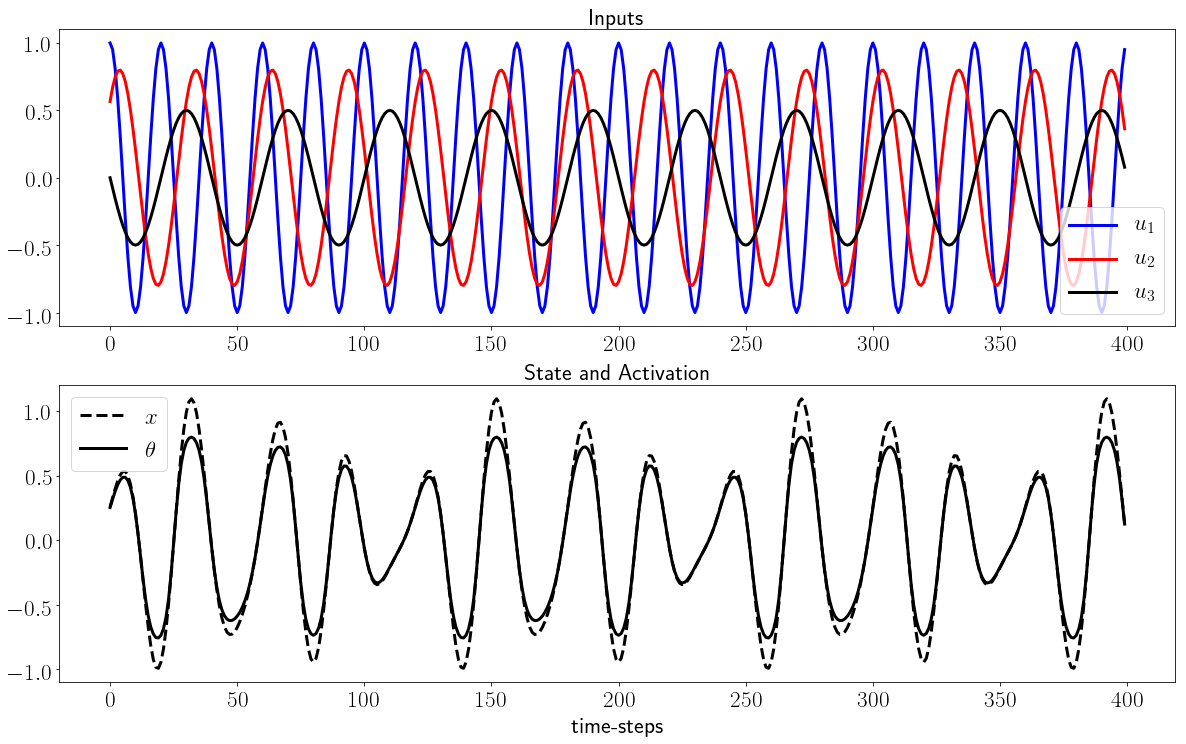

In [46]:
from matplotlib import pyplot as plt
from matplotlib import rc

# Set plot parameters
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Latin Modern Sans']})
params = {'font.size': 16,
          'figure.figsize': [20, 12],
          'text.usetex': True,
          'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

print(neuron.w)

# plot the stuff    
fig, axes = plt.subplots(2, 1)
axes[0].set_title(r"Inputs")
axes[0].plot(u0, color="blue", linewidth=3, label=r"$u_1$")
axes[0].plot(u1, color="red", linewidth=3, label=r"$u_2$")
axes[0].plot(u2, color="black", linewidth=3, label=r"$u_3$")
axes[0].legend()
axes[1].set_title(r"State and Activation")
axes[1].plot(x, color="black", linewidth=3, linestyle="dashed", label=r"$x$")
axes[1].plot(o, color="black", linewidth=3, label=r"$\theta$")
axes[1].legend()
axes[1].set_xlabel(r"time-steps")

Here we can see that the state $x$ of the neuron (weighted and summed inputs) looks the same like the output or activation $\theta$ (after $tanh()$) around zero but differs for values closer to $\pm 1$. This is desired saturation effect we wanted to model.

Now let's extend this to multiple neurons and call it a layer. We add another parameter to the initialisation for $n$ outputs. The only thing we need to change are the dimensions of the state `x` in line 5 and the dimension of the weight matrix `w` in line 8. That's it!

In [48]:
class layer:

    def __init__(self, n_inputs: int, n_outputs: int, seed: int = 42):
        np.random.seed(seed)
        self.x = np.zeros([n_outputs, 1])
        self.theta = 0
        self.u = np.zeros([n_inputs, 1])
        self.w = np.random.uniform(low=-1, high=1, size=[n_outputs, n_inputs])

    def activate(self, input_vector):
        self.x = np.dot(self.w, input_vector)
        self.theta = np.tanh(self.x)

    def step(self, input_vector):
        self.activate(input_vector)
        return self.theta

To run this layer with 2 neurons, we need to add a second row to our state and output storage arrays in lines 1 and 2:

In [49]:
x = np.zeros([2, length])
o = np.zeros([2, length])
neurons = layer(3, 2)

for i in range(length):
    o[:,i] = neurons.step(u[:,i])
    x[:,i] = neurons.x

[[-0.25091976  0.90142861  0.46398788]
 [ 0.19731697 -0.68796272 -0.68801096]]


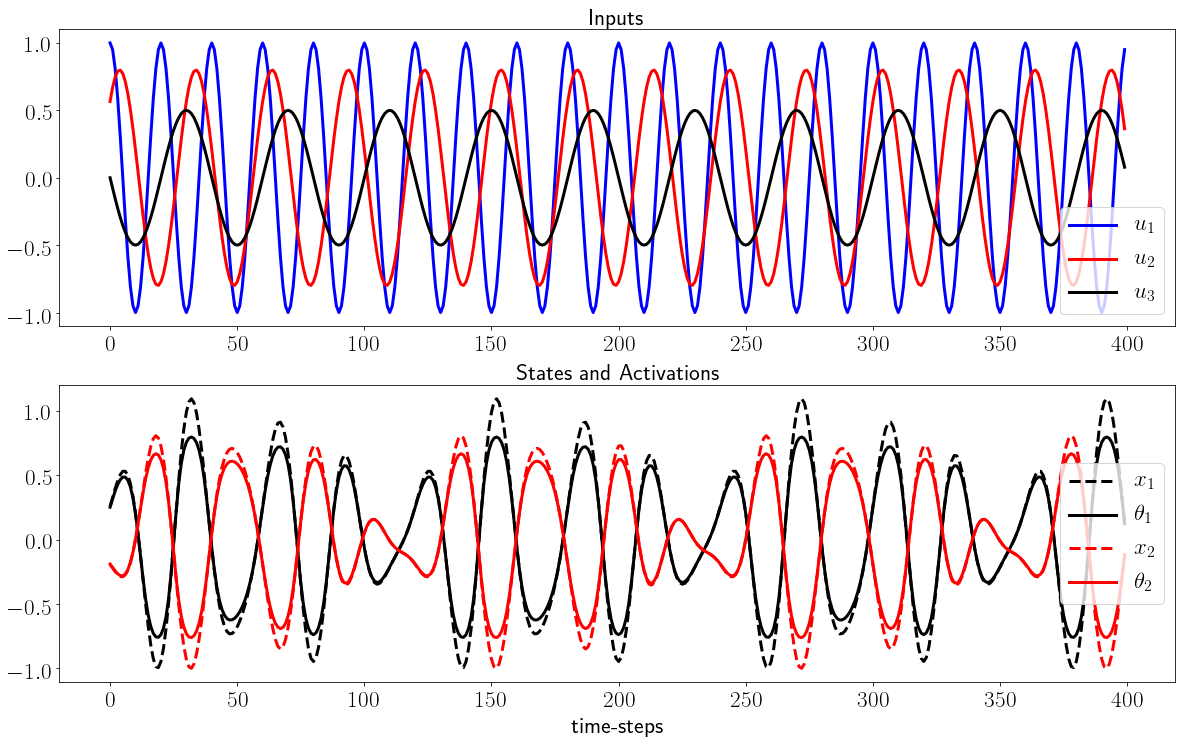

In [52]:
print(neurons.w)

# plot the stuff
fig, axes = plt.subplots(2, 1)
axes[0].set_title(r"Inputs")
axes[0].plot(u0, color="blue", linewidth=3, label=r"$u_1$")
axes[0].plot(u1, color="red", linewidth=3, label=r"$u_2$")
axes[0].plot(u2, color="black", linewidth=3, label=r"$u_3$")
axes[0].legend()
axes[1].set_title(r"States and Activations")
axes[1].plot(x[0,:], color="black", linewidth=3, linestyle="dashed", label=r"$x_1$")
axes[1].plot(o[0,:], color="black", linewidth=3, label=r"$\theta_1$")
axes[1].plot(x[1,:], color="red", linewidth=3, linestyle="dashed", label=r"$x_2$")
axes[1].plot(o[1,:], color="red", linewidth=3, label=r"$\theta_2$")
axes[1].legend()
axes[1].set_xlabel(r"time-steps")

Thanks to the fixed seed, the first row of the weight matrix, as well as the first output and state haven't changed. We just added a second neuron with a different transform of the inputs. Please recall that the states $X$ are just a linear combination of the inputs.

This is the basic model we will use and extend in following posts on modelling and learning. One problem of this model is, that the state of the neuron solely depends on the inputs at a current time-step. In biology neurons are a bit lazier: they do not only respond to the current input but also depend on their previous state. We are going to address this in the next post.

# References
<div style="font-size:80%;text-align:left">
    <a name="urry2017"><b>1.</b></a> Urry, L.A., Cain M.L., Wassermann, S.A., Minorsky, P.V., & Reece, J.B. (2017). Neurons, synapses, and signaling. In Campbell biology, 11th edition (p. 1065-1082). Pearson. Retrieved from <a target="_blank" rel="noopener" href="https://www.pearson.com/us/higher-education/product/Urry-Campbell-Biology-11th-Edition/9780134093413.html">https://www.pearson.com/us/higher-education/product/Urry-Campbell-Biology-11th-Edition/9780134093413.html</a>.
</div>
<div style="font-size:80%;text-align:left">
    <a name="izhikevich2003"><b>2.</b></a> Izhikevich, E. M. (2003). Simple model of spiking neurons. IEEE Transactions on Neural Networks, 14 (6), 1569-1572. Retrieved from <a target="_blank" rel="noopener" href="https://ieeexplore.ieee.org/abstract/document/1257420 ">https://ieeexplore.ieee.org/abstract/document/1257420</a>. doi: 10.1109/TNN.2003.820440
</div>
<div style="font-size:80%;text-align:left">
    <a name="haykin1999"><b>3.</b></a> Haykin, S. S. (1999). Neural networks: A comprehensive foundation. Prentice Hall. Retrieved from <a target="_blank" rel="noopener" href="https://books.google.de/books?id=M5abQgAACAAJ">https://books.google.de/books?id=M5abQgAACAAJ</a>. 
</div>
<div style="font-size:80%;text-align:left">
    <a name="hodgkin1952"><b>4.</b></a> Hodgkin, A. L., & Huxley, A. F. (1952). A quantitative description of membrane current and its application to conduction and excitation in nerve. The Journal of Physiology, 117 (4), 500-544. Retrieved from <a target="_blank" rel="noopener" href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/">https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/</a> 
</div>